In [60]:
import pandas as pd
import numpy as np
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from wordcloud import WordCloud
import seaborn as sns 
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [32]:
import nltk

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import re
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

In [35]:
data = pd. read_csv("data.csv")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [36]:
data["labels"] = data["class"]. map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
data = data[["tweet", "labels"]]
print(data. head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [37]:
import string

In [38]:
def clean (text):
 text = str (text). lower()
 text = re. sub('[.?]', '', text) 
 text = re. sub('https?://\S+|www.\S+', '', text)
 text = re. sub('<.?>+', '', text)
 text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
 text = re. sub('\n', '', text)
 text = re. sub('\w\d\w', '', text)
 text = [word for word in text.split(' ') if word not in stopword]
 text=" ". join(text)
 text = [stemmer. stem(word) for word in text. split(' ')]
 text=" ". join(text)
 return text
data["tweet"] = data["tweet"]. apply(clean)

Visualization

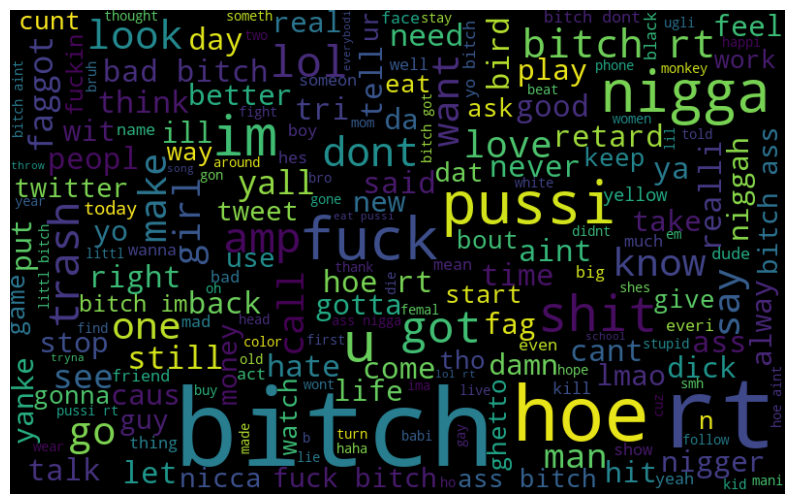

In [40]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in data['tweet'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
x = np. array(data["tweet"])
y = np. array(data["labels"])
cv = CountVectorizer()
X = cv. fit_transform(x)
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Model Building

Decision Tree

In [51]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
dtc_predict = dtc.predict(X_test)
dtc_acc = accuracy_score(dtc_predict, y_test)
print("Test accuarcy: {:.2f}%".format(dtc_acc*100))

Test accuarcy: 87.85%


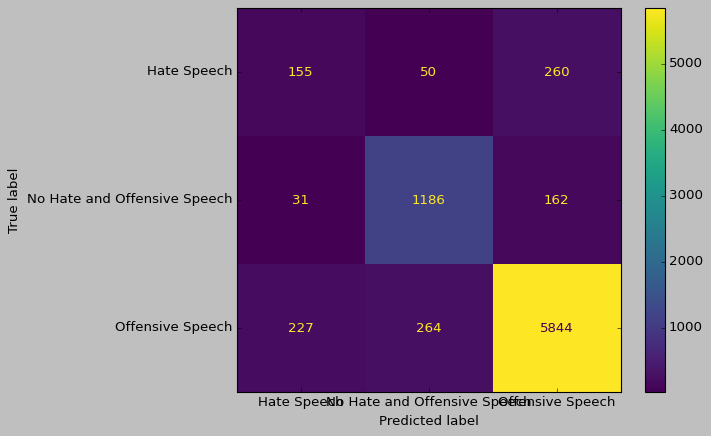

In [55]:
style.use('classic')
cm = confusion_matrix(y_test, dtc_predict, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()

Logistic Regression

In [56]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


c:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
logreg_predict = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 89.52%


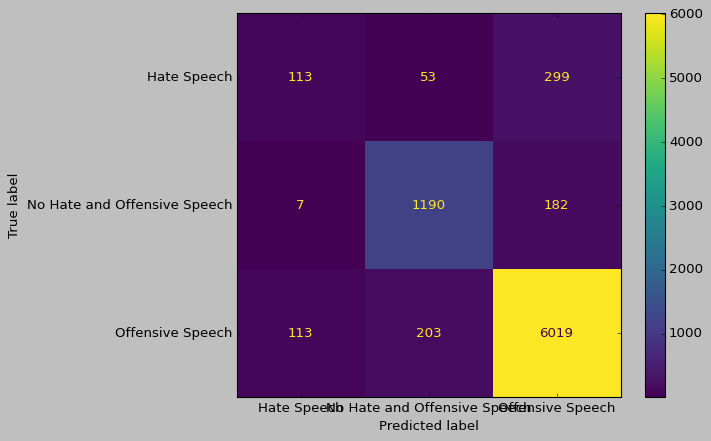

In [59]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

Ensamble Method

In [63]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators=[('lr', logreg), ('dt', dt)], voting='soft', weights=[1, 1])

ensemble.fit(X_train, y_train)

ensemble_preds = ensemble.predict(X_test)

c:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
ensemble_acc = accuracy_score(ensemble_preds, y_test)
print("Ensemble Test Accuracy: {:.2f}%".format(ensemble_acc*100))

Ensemble Test Accuracy: 88.02%


Implementation

In [58]:
inp = "hello"
inp = cv.transform([inp]).toarray()
print(logreg.predict(inp))

['No Hate and Offensive Speech']


Model Deployment

In [65]:
import pickle

In [71]:
x = data["tweet"]
y = data['labels']

In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [80]:
y = le.fit_transform(y)

In [81]:
le.classes_

array([0, 1, 2])

In [82]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('logreg', LogisticRegression())])
pipe.fit(X_train,y_train)

c:\Users\parth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logreg', LogisticRegression())])

In [84]:
y_pred2 = pipe.predict(X_test)
ac2 = accuracy_score(y_test, y_pred2)
print("Accuracy is : ",ac2)

Accuracy is :  0.8952194644822106


In [85]:
with open('trained_pipeline-0.1.0.pkl','wb') as f:
    pickle.dump(pipe,f)

In [88]:
inp = "hello"
inp = cv.transform([inp]).toarray()
print(pipe.predict(inp))

['No Hate and Offensive Speech']
